## Sentiment Analysis and Supervised Learning

In [ ]:
import pandas as pd
from collections import Counter
import re 
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import matplotlib.pyplot as plt
# Downloading nltk packages used in this example
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

Data source: SemEval 2017 sentiment task (https://alt.qcri.org/semeval2017/task4/index.php?id=data-and-tools)

### Data Cleaning

In [ ]:
# stopwords
stop = set(stopwords.words('english'))
#print (stop)

# punctuation 
exclude = set(string.punctuation) 

# change i'll to i will, won't to will not and so on
def decontracted(phrase):
    phrase = re.sub(r"\’", "\'", phrase)
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"shoudn\'t", "should not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
    phrase = re.sub(r"doesn\'t", "doesn not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# clean the tweets by removing mentions, hashtag symbols and links
def analyze_tweets(contents):
    contents = decontracted(contents)

    # remove any stop words present
    contents = ' '.join([item for item in contents.split() if item not in stop]) 
    # remove any stop words present
    contents = ''.join(ch for ch in contents if ch not in exclude)
    contents = re.sub(r'@[A-Za-z0-9_]+','', contents)
    
    # Removing Hyperlinks (if any)
    contents = re.sub(r"(https?://[^\s]+)", '', contents)
    ## Removing digits
    contents = ''.join(i for i in contents if not i.isdigit())
    
    contents = re.sub(r"[-()\'\"/;:<>{}`+=~|.!?,…—]", "", contents)
    # Expanding contractions
    
    contents = decontracted(contents)
    #contents = contents.lower().strip()
    return contents


Twitter API Setup

In [ ]:


apikey = 'Y4PcDl6rVWDEZ1XlzekuZTsGQ'
apisecretkey = 'vDKxuLeRBQJfoQHJsQsiN5wO2sFAGhrZGSWb61DZzwB9NaURth'
bearerToken = 'AAAAAAAAAAAAAAAAAAAAADBqiAEAAAAA0nA93ASsenuRyLtIdGW6wDWcY%2Fo%3DzOY7RfhuoDWcwWkNhVB2pwIBPYa0x3fknqFiGd96bLQMFgBeTQ'
accesstoken = '2882123819-zdnp2sn9ZaRjitq8WL3HtBdyvfkqXfGHjDcONqS'
accesstokensecret = 'TFVF1IKQ1fG8tcpfCPcpcrliyEISfkFJEIRWGvxjOWnEQ'

#!pip install tweepy

import tweepy as tw




In [ ]:
auth = tw.OAuthHandler(apikey,apisecretkey) 
auth.set_access_token(accesstoken,accesstokensecret) 
api = tw.API(auth,wait_on_rate_limit=False)


In [ ]:
keyword = ['covid','covid19','corona']
limit=300
tweets = tw.Cursor(api.search, q=keyword, tweet_mode='extended').items(limit)

In [ ]:
# create DataFrame
import pandas as pd
columns = ['TweetId', 'User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.id, tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

print(df)

                 TweetId            User  \
0    1580289715450048512     Arne_Timm_1   
1    1580289599976640513  MrsFamilycoach   
2    1580289398721036288  FreudigesLesen   
3    1580288227940110336   HerrSchwester   
4    1580287405860745218    Bot_Corona_V   
..                   ...             ...   
295  1580162612075016192    angela_3110_   
296  1580162156217061376        printi71   
297  1580161773311004672   AndreasKunze6   
298  1580161739458740225    HeinzeParker   
299  1580161698341584896     SapiensWell   

                                                 Tweet  
0    RT @RWittenbrink: „Diese tödliche COVID-Wendun...  
1    RT @RWittenbrink: „Diese tödliche COVID-Wendun...  
2    RT @RWittenbrink: „Diese tödliche COVID-Wendun...  
3    RT @RWittenbrink: „Diese tödliche COVID-Wendun...  
4    RT @covid19br_: Atualização #COVID19 Mundo\n\n...  
..                                                 ...  
295  RT @RWittenbrink: „Diese tödliche COVID-Wendun...  
296  RT @RWitte

In [ ]:
df

,TweetId,User,Tweet
0,1580289715450048512,Arne_Timm_1,RT @RWittenbrink: „Diese tödliche COVID-Wendun...
1,1580289599976640513,MrsFamilycoach,RT @RWittenbrink: „Diese tödliche COVID-Wendun...
2,1580289398721036288,FreudigesLesen,RT @RWittenbrink: „Diese tödliche COVID-Wendun...
3,1580288227940110336,HerrSchwester,RT @RWittenbrink: „Diese tödliche COVID-Wendun...
4,1580287405860745218,Bot_Corona_V,RT @covid19br_: Atualização #COVID19 Mundo\n\n...
...,...,...,...
295,1580162612075016192,angela_3110_,RT @RWittenbrink: „Diese tödliche COVID-Wendun...
296,1580162156217061376,printi71,RT @RWittenbrink: Die Daten sind eindeutig: #L...
297,1580161773311004672,AndreasKunze6,RT @RWittenbrink: Die Daten sind eindeutig: #L...
298,1580161739458740225,HeinzeParker,RT @RWittenbrink: „Diese tödliche COVID-Wendun...


In [ ]:
df['clean_tweet'] = df['Tweet'].apply(analyze_tweets)
df

,TweetId,User,Tweet,clean_tweet
0,1580289715450048512,Arne_Timm_1,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...
1,1580289599976640513,MrsFamilycoach,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...
2,1580289398721036288,FreudigesLesen,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...
3,1580288227940110336,HerrSchwester,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...
4,1580287405860745218,Bot_Corona_V,RT @covid19br_: Atualização #COVID19 Mundo\n\n...,RT covidbr Atualização COVID Mundo Atualização...
...,...,...,...,...
295,1580162612075016192,angela_3110_,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...
296,1580162156217061376,printi71,RT @RWittenbrink: Die Daten sind eindeutig: #L...,RT RWittenbrink Die Daten sind eindeutig LongC...
297,1580161773311004672,AndreasKunze6,RT @RWittenbrink: Die Daten sind eindeutig: #L...,RT RWittenbrink Die Daten sind eindeutig LongC...
298,1580161739458740225,HeinzeParker,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...


In [ ]:
import nltk
#nltk.download('sentiwordnet')
#nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
list(swn.senti_synsets('slow'))
sentence='covid19 is very dangerous!'
from nltk.tag import pos_tag
token = nltk.word_tokenize(sentence)
after_tagging = nltk.pos_tag(token)
print (token)
print (after_tagging)
tokens_count=0
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
sentiment = 0.0
#tokens_count = 0
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for word, tag in after_tagging:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
 
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
 
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
 
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            print(swn_synset)
 
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
print (sentiment)

['covid19', 'is', 'very', 'dangerous', '!']
[('covid19', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('dangerous', 'JJ'), ('!', '.')]
<very.r.01: PosScore=0.25 NegScore=0.25>
<dangerous.a.01: PosScore=0.0 NegScore=0.75>
-0.75


In [ ]:
sentiment_list = []
for sentence in df['clean_tweet']:
  #sentence='covid19 is very dangerous!'
  token = nltk.word_tokenize(sentence)
  after_tagging = nltk.pos_tag(token)
  print (token)
  print (after_tagging)
  tokens_count=0
  def penn_to_wn(tag):
      """
      Convert between the PennTreebank tags to simple Wordnet tags
      """
      if tag.startswith('J'):
          return wn.ADJ
      elif tag.startswith('N'):
          return wn.NOUN
      elif tag.startswith('R'):
          return wn.ADV
      elif tag.startswith('V'):
          return wn.VERB
      return None
  sentiment = 0.0
  #tokens_count = 0
  from nltk.stem import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()
  for word, tag in after_tagging:
              wn_tag = penn_to_wn(tag)
              if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                  continue
  
              lemma = lemmatizer.lemmatize(word, pos=wn_tag)
              if not lemma:
                  continue
  
              synsets = wn.synsets(lemma, pos=wn_tag)
              if not synsets:
                  continue
  
              # Take the first sense, the most common
              synset = synsets[0]
              swn_synset = swn.senti_synset(synset.name())
              print(swn_synset)
  
              sentiment += swn_synset.pos_score() - swn_synset.neg_score()
              tokens_count += 1
  if sentiment>0:
    sentiment_list.append('positive')
  elif sentiment<0:
    sentiment_list.append('negative')
  else:
    sentiment_list.append('neutral')

df['sentiment'] = sentiment_list
df

['RT', 'RWittenbrink', '„', 'Diese', 'tödliche', 'COVIDWendung', 'ist', 'wie', 'nichts', 'wir', 'zuvor', 'gesehen', 'haben', '“', 'Einer', 'der', 'wichtigen', 'Trends', 'während', 'die', 'COVI']
[('RT', 'NNP'), ('RWittenbrink', 'NNP'), ('„', 'NNP'), ('Diese', 'NNP'), ('tödliche', 'NN'), ('COVIDWendung', 'NNP'), ('ist', 'NN'), ('wie', 'NN'), ('nichts', 'NNS'), ('wir', 'VBP'), ('zuvor', 'NN'), ('gesehen', 'NN'), ('haben', 'NN'), ('“', 'NNP'), ('Einer', 'NNP'), ('der', 'NN'), ('wichtigen', 'NN'), ('Trends', 'NNP'), ('während', 'VBP'), ('die', 'NN'), ('COVI', 'NNP')]
<tendency.n.04: PosScore=0.0 NegScore=0.0>
<die.n.01: PosScore=0.0 NegScore=0.0>
['RT', 'RWittenbrink', '„', 'Diese', 'tödliche', 'COVIDWendung', 'ist', 'wie', 'nichts', 'wir', 'zuvor', 'gesehen', 'haben', '“', 'Einer', 'der', 'wichtigen', 'Trends', 'während', 'die', 'COVI']
[('RT', 'NNP'), ('RWittenbrink', 'NNP'), ('„', 'NNP'), ('Diese', 'NNP'), ('tödliche', 'NN'), ('COVIDWendung', 'NNP'), ('ist', 'NN'), ('wie', 'NN'), ('nich

,TweetId,User,Tweet,clean_tweet,sentiment
0,1580289715450048512,Arne_Timm_1,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...,neutral
1,1580289599976640513,MrsFamilycoach,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...,neutral
2,1580289398721036288,FreudigesLesen,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...,neutral
3,1580288227940110336,HerrSchwester,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...,neutral
4,1580287405860745218,Bot_Corona_V,RT @covid19br_: Atualização #COVID19 Mundo\n\n...,RT covidbr Atualização COVID Mundo Atualização...,neutral
...,...,...,...,...,...
295,1580162612075016192,angela_3110_,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...,neutral
296,1580162156217061376,printi71,RT @RWittenbrink: Die Daten sind eindeutig: #L...,RT RWittenbrink Die Daten sind eindeutig LongC...,neutral
297,1580161773311004672,AndreasKunze6,RT @RWittenbrink: Die Daten sind eindeutig: #L...,RT RWittenbrink Die Daten sind eindeutig LongC...,neutral
298,1580161739458740225,HeinzeParker,RT @RWittenbrink: „Diese tödliche COVID-Wendun...,RT RWittenbrink „Diese tödliche COVIDWendung i...,neutral


In [ ]:
df['sentiment'].value_counts()

neutral     253
positive     40
negative      7
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7f89781253d0>,
 [Text(-0.9694337492526551, 0.5198059309107009, 'neutral'),
  Text(0.9287606220311782, -0.589409625781815, 'positive'),
  Text(1.09704591360761, -0.08056217125204906, 'negative')])

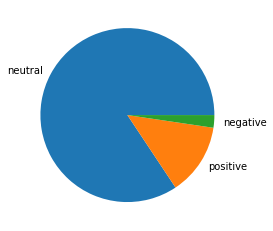

In [ ]:
plt.pie(df['sentiment'].value_counts(), labels=['neutral','positive','negative'])